In [1]:
from scoring import score
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ultralytics.engine.results import Results


In [11]:
def rle_encode(mask):
    pixel = mask.flatten()
    pixel = np.concatenate([[0], pixel, [0]])
    run = np.where(pixel[1:] != pixel[:-1])[0] + 1
    run[1::2] -= run[::2]
    rle = ' '.join(str(r) for r in run)
    if rle == '':
        rle = '1 0'
    return rle


def add_masks(masks):
    result = 255*(np.sum(masks, axis=0))
    result = result.clip(0, 255).astype("uint8")
    return result


def get_rle_from_result(result: Results):
    if not result.masks:
        return '1 0'
    else:
        masks_array = result.masks.data.numpy()
        combined_mask = add_masks(masks_array)
        return rle_encode(combined_mask)

In [12]:
project = 'blood_vessel_segmentation'

In [3]:
model = YOLO('yolov8n-seg.pt')
validation_images = '../dataset/val/images/*.tif'
results = model.predict(validation_images, 
                        device='mps', 
                        retina_masks=True, 
                        conf=0.1)


image 1/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1005.tif: 640x448 2 vases, 473.5ms
image 2/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1025.tif: 640x448 1 vase, 14.1ms
image 3/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1045.tif: 640x448 1 bowl, 1 clock, 13.6ms
image 4/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1065.tif: 640x448 1 clock, 12.5ms
image 5/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1085.tif: 640x448 1 vase, 13.0ms
image 6/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1105.tif: 640x448 1 bowl, 1 vase, 12.7ms
image 7/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1125.tif: 640x448 1 bowl,

In [13]:
model = YOLO(f'{artifact_dir}/best.pt')
validation_images = '../dataset/val/images/*.tif'
results = model.predict(validation_images, 
                        device='mps', 
                        retina_masks=True, 
                        conf=0.1)

wandb:   1 of 1 files downloaded.  



image 1/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1005.tif: 1024x736 64 Vessels, 22.7ms
image 2/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1025.tif: 1024x736 59 Vessels, 13.0ms
image 3/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1045.tif: 1024x736 50 Vessels, 11.8ms
image 4/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1065.tif: 1024x736 59 Vessels, 11.2ms
image 5/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1085.tif: 1024x736 55 Vessels, 11.3ms
image 6/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1105.tif: 1024x736 59 Vessels, 10.2ms
image 7/25 /Users/alexlitvinov/Documents/projects/hacking_human_vasculature/notebooks/../dataset/val/images/1125.tif: 1024x

  0%|          | 0/1 [00:00<?, ?it/s]

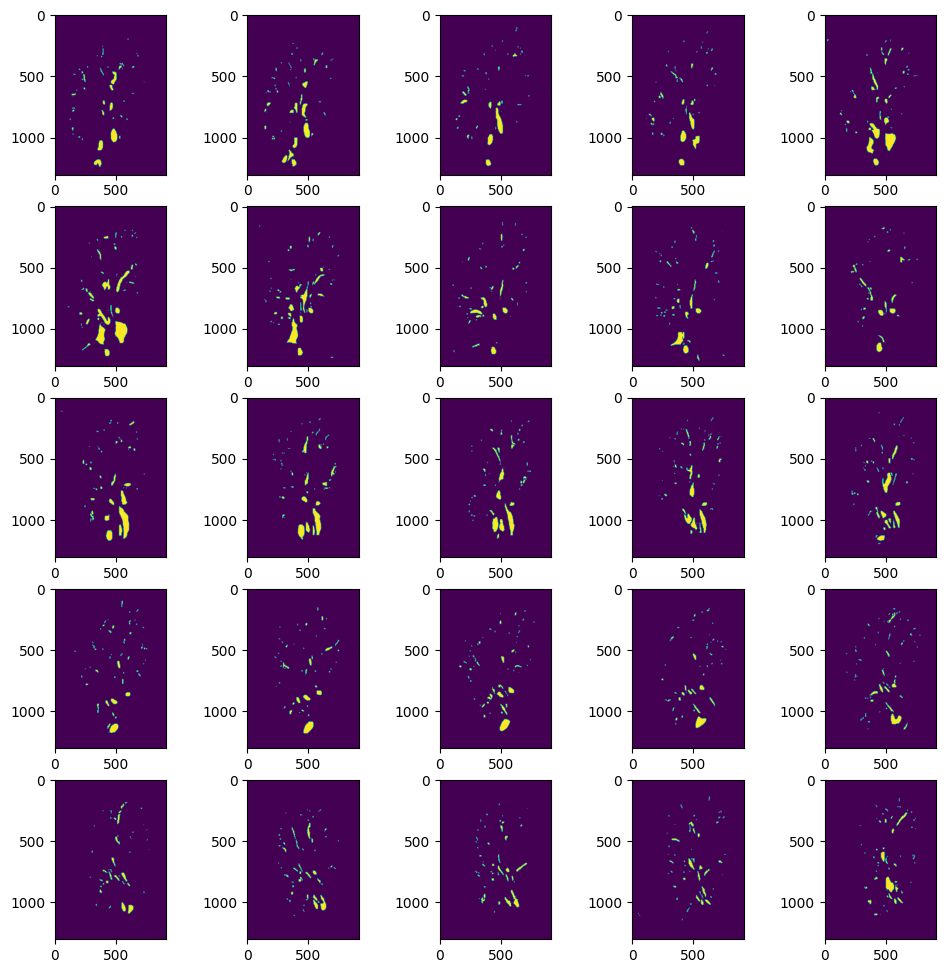

In [32]:
plt.figure(figsize=(12,12))
for n, res in enumerate(results):
    ax = plt.subplot(5,5,n+1)
    masks_array = res.masks.data.cpu().numpy()
    combined_mask = add_masks(masks_array)
    ax.imshow(combined_mask)


In [ ]:
# Plot 

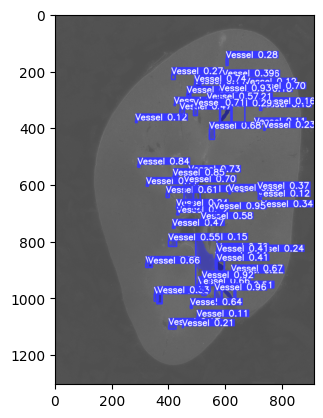

In [29]:
plt.imshow(results[-1].plot())